# Principal compoenet analysis 실습

대부분의 머신러닝을 모듈에 포함하고, 이에 대한 예제와 정보가 담겨있는 웹사이트 참고: https://scikit-learn.org

# 1. 데이터 전처리 및 데이터 파악

- scikit-lean 패키지에서 데이터와 PCA 로드.

In [2]:
from sklearn import datasets
from sklearn.decomposition import PCA

- 자료 처리에 도움을 줄 pandas, numpy와 시각화를 위한 pyplot, seaborn 로드.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

- iris 데이터를 불러오고, 구조를 살핌.

## irirs

#### 꽃받침의 길이 폭 등등을 보고 꽃의 종류 예측하기

타겟데이터

setosa, versicolor, virginica의 세가지 붓꽃 종(species)


특징 데이터

꽃받침 길이(Sepal Length)
꽃받침 폭(Sepal Width)
꽃잎 길이(Petal Length)
꽃잎 폭(Petal Width)

In [4]:
iris=datasets.load_iris()
dir(iris) #dir:어떠한 객체들을 포함하는가

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [5]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

- 설명의 편의를 위하여, 독립변수 중 처음 2개만을 사용.

In [7]:
x=iris.data[:,[0,2]] #전체행,0,2열
y=iris.target

In [8]:
print(x.shape)
feature_names=[iris.feature_names[0],iris.feature_names[2]] #0,2만 가져오기
df_x=pd.DataFrame(x) #사용하기 쉽게 dataframe 으로 바꿈
df_x.head()

(150, 2)


,0,1
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


In [9]:
print(y.shape)
df_y=pd.DataFrame(y)
df_y.head()

(150,)


,0
0,0
1,0
2,0
3,0
4,0


- 결측치 여부를 파악.

In [10]:
print(df_x.isnull().sum())
print(df_y.isnull().sum())
#결측치 갯수확인 확인해보니까 앖음

0    0
1    0
dtype: int64
0    0
dtype: int64


In [11]:
#y는 번주형 범주이므로 어떤 범주가 있는지 확인

print(set(y))
iris.target_names
#0이면 setosa,1이면 versicolor,3이면 virginica

{0, 1, 2}


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

- 종속 변수 (출력변수, 반응변수)의 분포를 살핌.

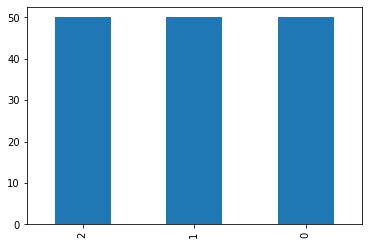

In [12]:
#한개의 범주에 쏠려있을수도 있으니 확인
df_y[0].value_counts().plot(kind='bar')#번주형변수 각각 몇개인지 
plt.show()
#범주가 골고루 있다

- 독립 변수 (속성, 입력변수, 설명변수)의 분포를 살핌.

In [13]:
print(x.shape)

(150, 2)


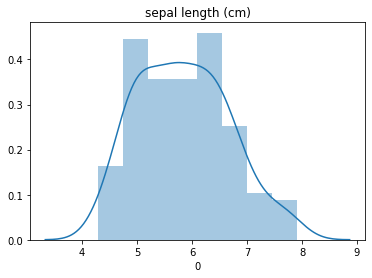

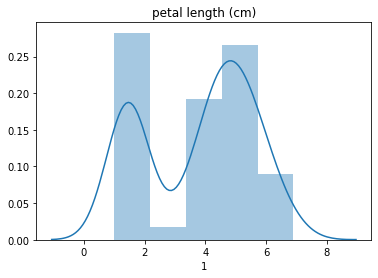

In [14]:
#요약(기술통계량) x데이터의 분포를 확인
for i in range(df_x.shape[1]): #0~1까지 df_x.shape[1]가 2이니까
    sns.distplot(df_x[i])
    plt.title(feature_names[i])
    plt.show()
    

# 2. PCA 함수 활용 및 아웃풋 의미파악

만약, 2개의 변수로도 4개(전체)의 변수의  분산에 대해 설명할 수 있다면

target을 분류할 때 2개만 사용하면 되지 않을까? 

주성분이란 전체 데이터(독립변수들)의 분산을 가장 잘 설명하는 성분이라고 할 수 있다. 

하나의 변수는 하나의 차원을 의미한다. 

차원이 증가할수록 데이터가 표현해야 하는 공간은 복잡해진다. 




전체 데이터(독립변수들)의 분산을 가장 잘 설명하는 축의 개수를 선정해서 

그 축에 따라 변형된 데이터를 배열하면 그 데이터가 주성분이 된다.

​

 주성분은 원래의 데이터와 다르다.

- PCA 함수를 활용하여 PC를 얻어냄. 아래의 경우 PC 2개를 뽑아냄.

In [15]:
pca=PCA(n_components=2) #전체 데이터(독립변수들)의 분산을 가장 잘 설명하는 축의 개수=2
pca.fit(x) #그 축에따라 다시 데이터 배열

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

- 아래와 같이 PC score를 얻어냄. 아래의 PC score를 이용하여, 회귀분석에 활용할 수 있음.

In [16]:
pca.explained_variance_ #eigen value 고유값
#고유값이 클수록 전체데이터를 가장 잘설명하는 축(pc)이다
#첫번째 축이 더높음==더중요

array([3.66189877, 0.1400726 ])

In [17]:
PCscore=pca.transform(x)
#PCscore 새로운 축으로 데이터 정사영해서 찍은 점의 좌표
PCscore[0:5] #[k:j] k에서 j전까지

array([[-2.46024094, -0.24479165],
       [-2.53896211, -0.06093579],
       [-2.70961121,  0.08355948],
       [-2.56511594,  0.25420858],
       [-2.49960153, -0.15286372]])

In [18]:
eigens_v=pca.components_.transpose()#행이 각각의 변수,열이 각각의 eigen vector가 되도록 transpose시켜야함
print(eigens_v)
#0번째 칼럼:설명력이 높았던 축
#1번째 칼럼:설명력이 상대적으로 낮았던 축

[[ 0.39360585 -0.9192793 ]
 [ 0.9192793   0.39360585]]


In [19]:
#곱하기전에 센터링 해주기
mX=np.matrix(x)
for i in range(x.shape[1]):
    mX[:,i]=mX[:,i]-np.mean(x[:,i])
    
dfmX=pd.DataFrame(mX)

In [20]:
#곱하기 v:고유벡터 x:새로운 축 (xtx)v
(mX*eigens_v)[0:5]
#PCscore 새로운 축에서의 좌표값
#위와 일치

matrix([[-2.46024094, -0.24479165],
        [-2.53896211, -0.06093579],
        [-2.70961121,  0.08355948],
        [-2.56511594,  0.25420858],
        [-2.49960153, -0.15286372]])

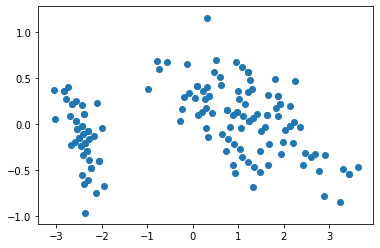

In [21]:
#새로운 축으로 구하 pcscore의 산점도
plt.scatter(PCscore[:,0],PCscore[:,1])
plt.show()

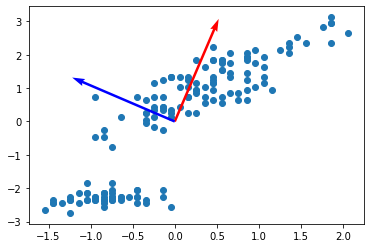

In [22]:
#원래 데이터
plt.scatter(dfmX[0],dfmX[1])
origin = [0], [0] # origin point
plt.quiver(*origin, eigens_v[0,:], eigens_v[1,:], color=['r','b'], scale=3)
plt.show()
#x1,x2둘다 x,y축에 정사영을 내렸을때 분포가 넓다==pca하면 좋은 결과가 나올수 있다
#즉,둘이 같은것을 설명하는 부분이 많다
#빨강:pc1,파랑:pc2
#정사영을 내려보면 pc1은 넓게 분포하고 pc2는 좁게 분포한다
#즉,pcscore는 pc1(x축)은 많이 설명하고 pc2(y축)는 적게 설명하는 자료의 형태로 바뀐다

# 3. PC를 활용한 회귀분석

- 이번에는 모든 독립변수를 활용하여 PC를 뽑아냄.

In [23]:
X2 = iris.data
pca2 = PCA(n_components=4) #축4개 pc4까지
pca2.fit(X2)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [24]:
pca2.explained_variance_ #pca각각의 eigen value값
#pc1이 가장 높으므로 가장 중요
#pc1가 pc2에 비해 20배 중요하므로 이런 경우에는 차원축소가 가능할거같다

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

In [25]:
PCs=pca2.transform(X2)[:,0:2]#pc를 2개만 선택 차원축소 가능하므로

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

- 모델의 복잡성으로 인하여 기존 자료를 이용한 분석은 수렴하지 않는 모습.

In [29]:
#그냥 데이터로 모델을 만들었을 때
clf=LogisticRegression(solver="sag",multi_class='multinomial').fit(X2,y)

C:\Users\Younjiei\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


the coef_ did not converge" 회기계수값의 해를 찾지못한다

그러므로 모델을 더 간단하게 만들어야 한다 -->pca사용으로 차원축소

- PC 2개 만을 뽑아내여 분석한 경우 모델이 수렴.

In [30]:
clf2=LogisticRegression(solver="sag",multi_class='multinomial').fit(PCs,y)

In [35]:
confusion_matrix(y,clf2.predict(PCs)) #confusion_matrix: 실제갑과 예측값이 얼마나 차이가 나는지
#행방향으로 y값3가지중 1범주는 50개 중 다 맞음 2범주는 50개중 47개맞고 3개 틀림,3범주는 50개중에 48개 맞고 2개틀림

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  2, 48]], dtype=int64)

- 임의로 변수 2개 만을 뽑아내여 분석한 경우 모델의 퍼포먼스가 하락함.

In [38]:
clf = LogisticRegression(solver='sag', max_iter=1000, random_state=0,
                             multi_class="multinomial").fit(X2[:,0:2], y) #변수 x를 2개만사용해봄

In [41]:
confusion_matrix(y, clf.predict(X2[:,0:2])) #많이 틀림 

array([[49,  1,  0],
       [ 0, 37, 13],
       [ 0, 14, 36]], dtype=int64)

- 위와 같이, 차원축소를 통하여 모델의 복잡성을 줄이는 동시에 최대한 많은 정보를 활용하여 분석할 수 있음.